In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Sales-Win-Loss.csv')
df

,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,1641984,Exterior Accessories,Car Accessories,Northwest,Fields Sales,76,Won,13,104,101,0,5,5,0,Unknown,0.69636,0.113985,0.154215,1
1,1658010,Exterior Accessories,Car Accessories,Pacific,Reseller,63,Loss,2,163,163,0,3,5,0,Unknown,0.00000,1.000000,0.000000,1
2,1674737,Motorcycle Parts,Performance & Non-auto,Pacific,Reseller,24,Won,7,82,82,7750,1,1,0,Unknown,1.00000,0.000000,0.000000,1
3,1675224,Shelters & RV,Performance & Non-auto,Midwest,Reseller,16,Loss,5,124,124,0,1,1,0,Known,1.00000,0.000000,0.000000,1
4,1689785,Exterior Accessories,Car Accessories,Pacific,Reseller,69,Loss,11,91,13,69756,1,1,0,Unknown,0.00000,0.141125,0.000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78020,10089932,Batteries & Accessories,Car Accessories,Southeast,Reseller,0,Loss,2,0,0,250000,1,1,3,Unknown,0.00000,0.000000,0.000000,6
78021,10089961,Shelters & RV,Performance & Non-auto,Northeast,Reseller,0,Won,1,0,0,180000,1,1,0,Unknown,0.00000,0.000000,0.000000,5
78022,10090145,Exterior Accessories,Car Accessories,Southeast,Reseller,0,Loss,2,0,0,90000,1,1,0,Unknown,0.00000,0.000000,0.000000,4
78023,10090430,Exterior Accessories,Car Accessories,Southeast,Fields Sales,0,Loss,2,0,0,120000,1,1,0,Unknown,1.00000,0.000000,0.000000,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78025 entries, 0 to 78024
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Opportunity Number                       78025 non-null  int64  
 1   Supplies Subgroup                        78025 non-null  object 
 2   Supplies Group                           78025 non-null  object 
 3   Region                                   78025 non-null  object 
 4   Route To Market                          78025 non-null  object 
 5   Elapsed Days In Sales Stage              78025 non-null  int64  
 6   Opportunity Result                       78025 non-null  object 
 7   Sales Stage Change Count                 78025 non-null  int64  
 8   Total Days Identified Through Closing    78025 non-null  int64  
 9   Total Days Identified Through Qualified  78025 non-null  int64  
 10  Opportunity Amount USD                   78025

In [4]:
df = df.drop(['Opportunity Number','Competitor Type'],axis=1)
df

,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,Exterior Accessories,Car Accessories,Northwest,Fields Sales,76,Won,13,104,101,0,5,5,0,0.69636,0.113985,0.154215,1
1,Exterior Accessories,Car Accessories,Pacific,Reseller,63,Loss,2,163,163,0,3,5,0,0.00000,1.000000,0.000000,1
2,Motorcycle Parts,Performance & Non-auto,Pacific,Reseller,24,Won,7,82,82,7750,1,1,0,1.00000,0.000000,0.000000,1
3,Shelters & RV,Performance & Non-auto,Midwest,Reseller,16,Loss,5,124,124,0,1,1,0,1.00000,0.000000,0.000000,1
4,Exterior Accessories,Car Accessories,Pacific,Reseller,69,Loss,11,91,13,69756,1,1,0,0.00000,0.141125,0.000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78020,Batteries & Accessories,Car Accessories,Southeast,Reseller,0,Loss,2,0,0,250000,1,1,3,0.00000,0.000000,0.000000,6
78021,Shelters & RV,Performance & Non-auto,Northeast,Reseller,0,Won,1,0,0,180000,1,1,0,0.00000,0.000000,0.000000,5
78022,Exterior Accessories,Car Accessories,Southeast,Reseller,0,Loss,2,0,0,90000,1,1,0,0.00000,0.000000,0.000000,4
78023,Exterior Accessories,Car Accessories,Southeast,Fields Sales,0,Loss,2,0,0,120000,1,1,0,1.00000,0.000000,0.000000,5


C:\Users\verdi\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1440x720 with 0 Axes>

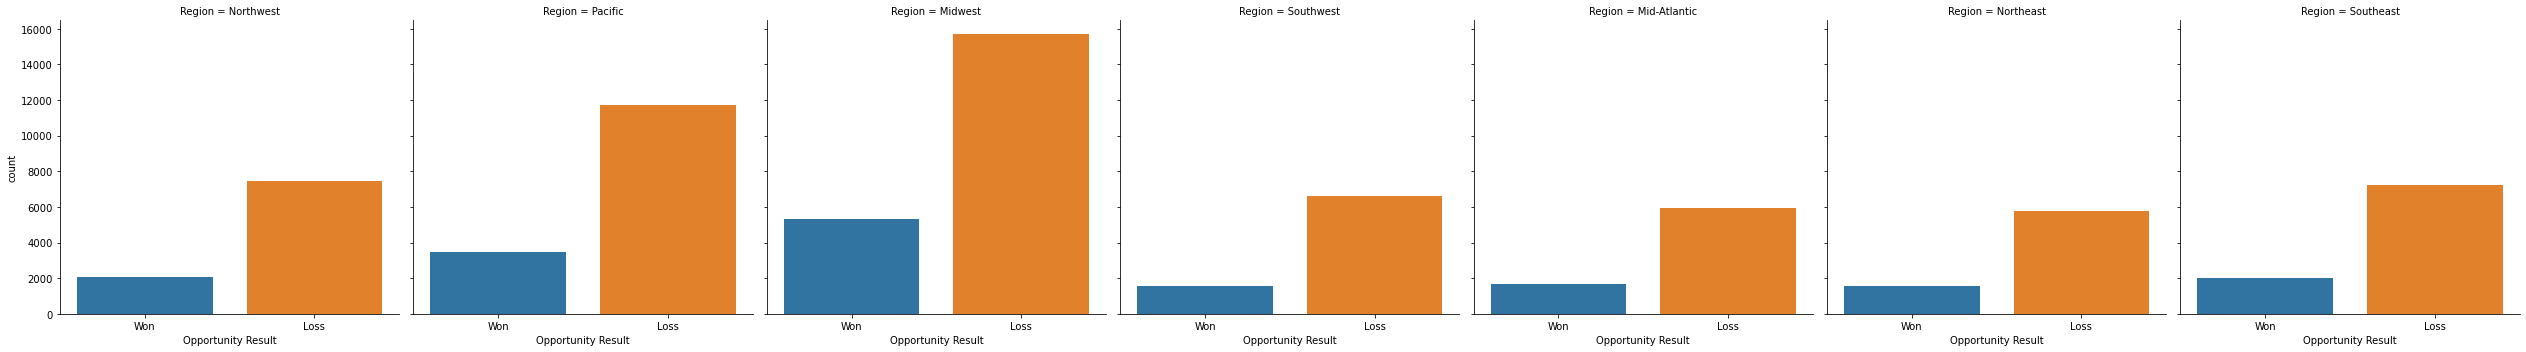

In [5]:
plt.figure(figsize=(20,10))
sns.factorplot(x='Opportunity Result',col='Region',kind='count',data=df)

In [6]:
regions = df.Region.unique()
for region in regions:
    cond_1 = df.loc[df.Region == region]
    result = cond_1.loc[cond_1['Opportunity Result'] == 'Loss'].count()/len(cond_1['Opportunity Result'])
    print(region, result[2])

Northwest 0.7828726968174204
Pacific 0.7725531633866067
Midwest 0.7462892483349192
Southwest 0.8112351281736784
Mid-Atlantic 0.7818446088794926
Northeast 0.787306333242729
Southeast 0.7810875216637782


<Figure size 1440x720 with 0 Axes>

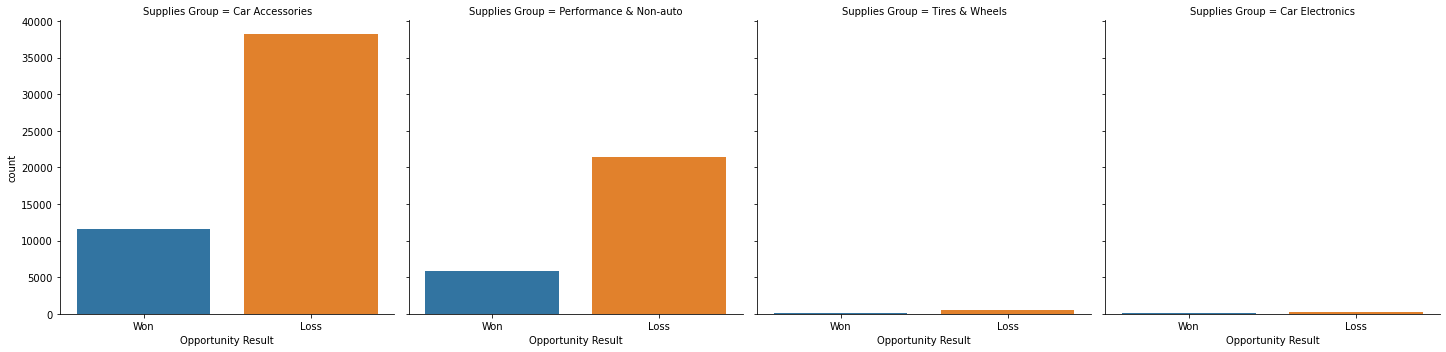

In [7]:
plt.figure(figsize=(20,10))
sns.factorplot(x='Opportunity Result',col='Supplies Group',kind='count',data=df)

In [8]:
groups = df['Supplies Group'].unique()
for group in groups:
    cond_2 = df.loc[df['Supplies Group'] == group]
    result_2 = cond_2.loc[cond_2['Opportunity Result'] == 'Loss'].count()/len(cond_2['Opportunity Result'])
    print(group, result_2[2])

Car Accessories 0.7665328247339892
Performance & Non-auto 0.7859103385178408
Tires & Wheels 0.8784893267651889
Car Electronics 0.7366548042704626


<Figure size 1440x1440 with 0 Axes>

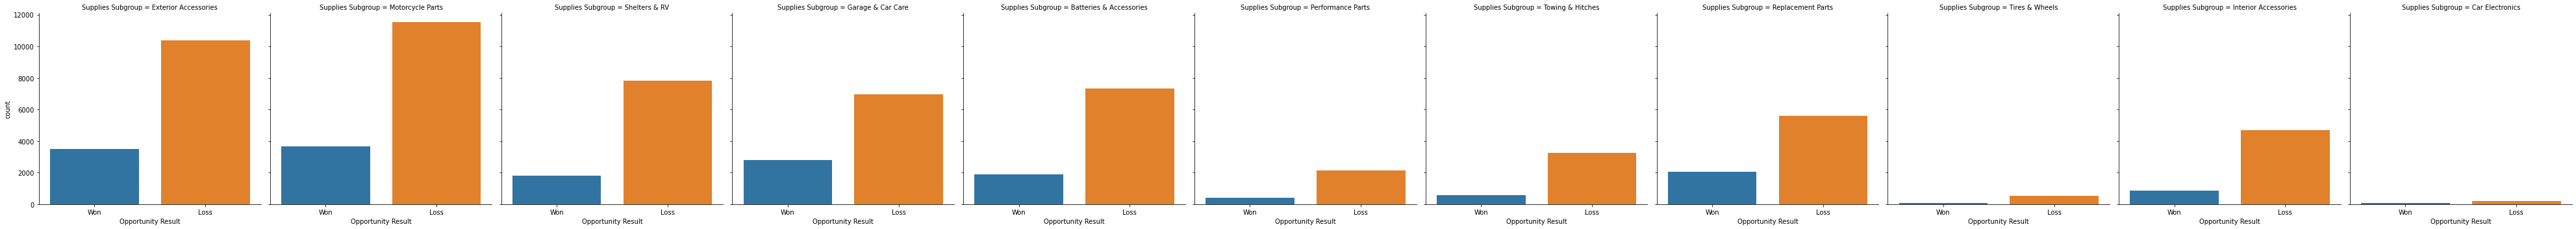

In [9]:
plt.figure(figsize=(20,20))
sns.factorplot(x='Opportunity Result',col='Supplies Subgroup',kind='count',data=df)

In [10]:
sub_groups = df['Supplies Subgroup'].unique()
for group in sub_groups:
    cond_3 = df.loc[df['Supplies Subgroup'] == group]
    result_3 = cond_3.loc[cond_3['Opportunity Result'] == 'Loss'].count()/len(cond_3['Opportunity Result'])
    print(group, result_3[2])

Exterior Accessories 0.7475497261458633
Motorcycle Parts 0.7590615526558587
Shelters & RV 0.8135540287320425
Garage & Car Care 0.7145792664132333
Batteries & Accessories 0.796562228024369
Performance Parts 0.8416502946954814
Towing & Hitches 0.8491356731272918
Replacement Parts 0.7323245499608662
Tires & Wheels 0.8784893267651889
Interior Accessories 0.8461538461538461
Car Electronics 0.7366548042704626


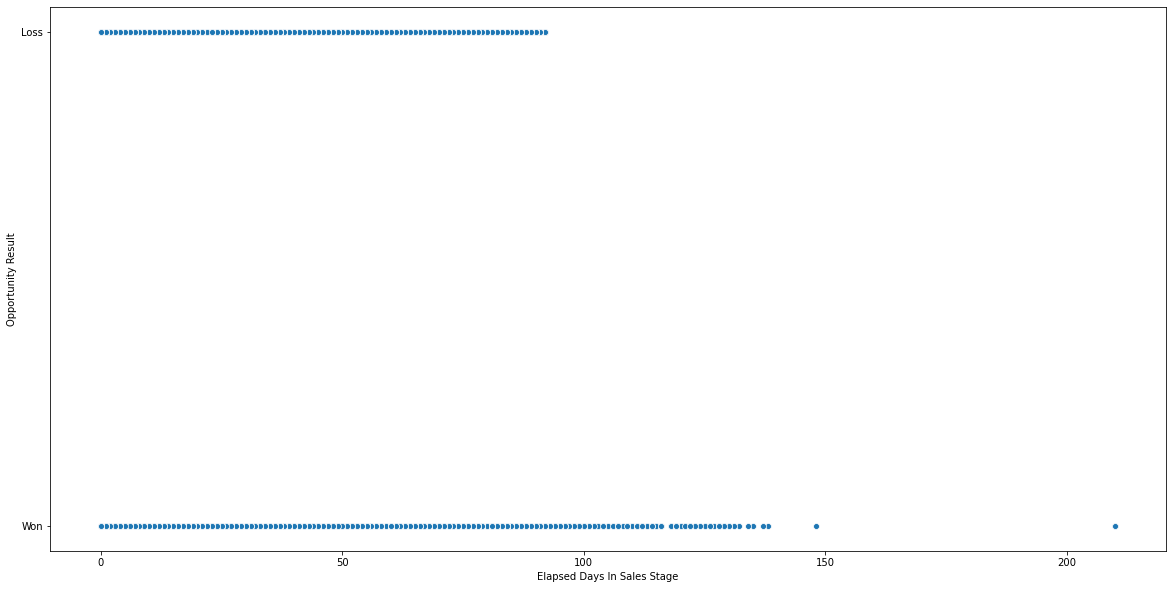

In [11]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='Elapsed Days In Sales Stage',y='Opportunity Result',data=df)

<Figure size 1440x360 with 0 Axes>

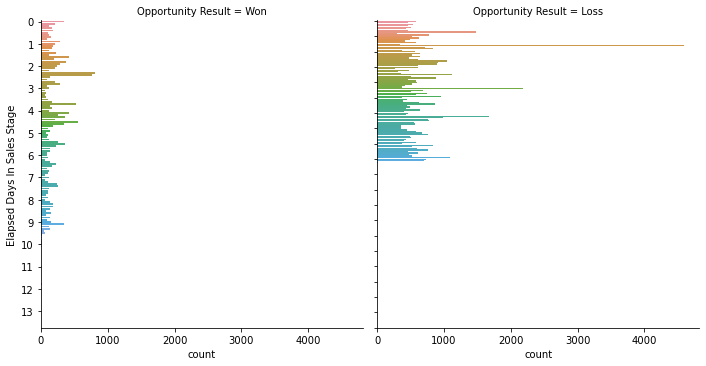

In [12]:
plt.figure(figsize=(20,5))
sns.factorplot(y='Elapsed Days In Sales Stage',col='Opportunity Result',kind='count',data=df,orient='h')
plt.yticks(range(0,210,10));

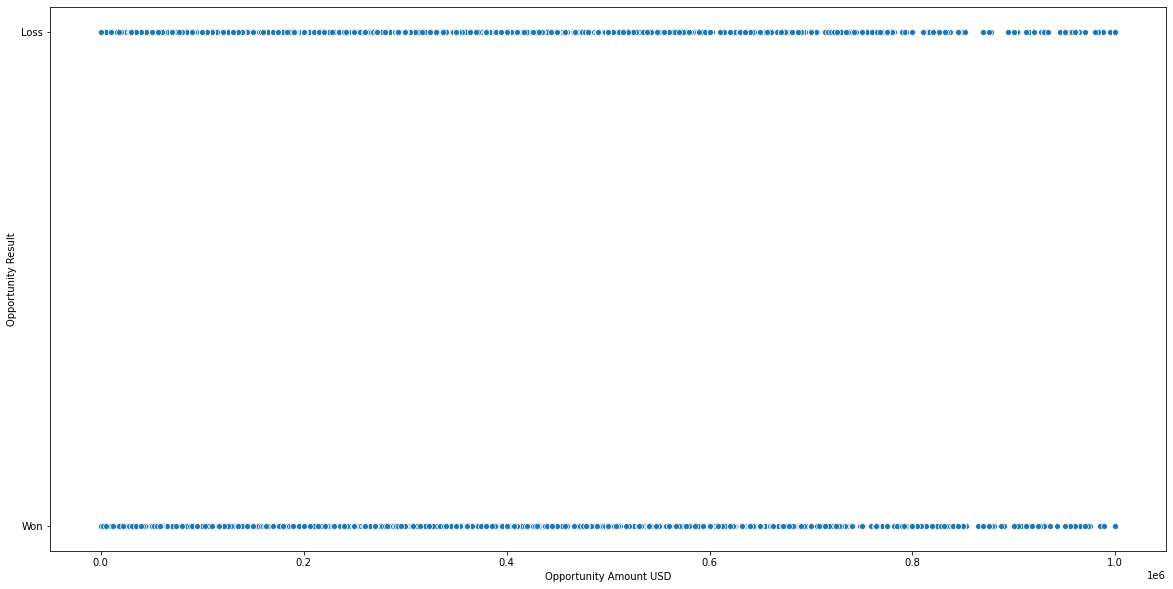

In [13]:
plt.figure(figsize=(20,10))
sns.scatterplot(x='Opportunity Amount USD',y='Opportunity Result',data=df)

<Figure size 1440x360 with 0 Axes>

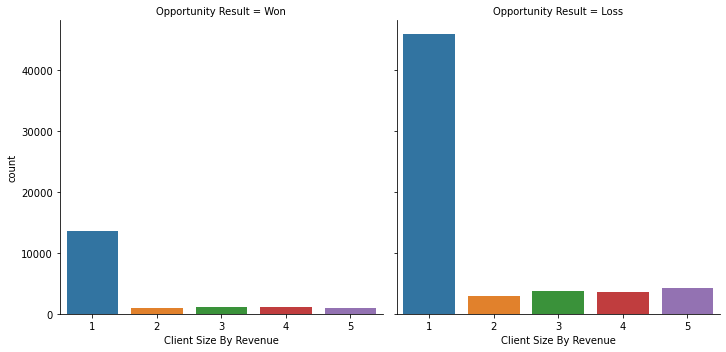

In [14]:
plt.figure(figsize=(20,5))
sns.factorplot(x='Client Size By Revenue',col='Opportunity Result',kind='count',data=df)

<Figure size 1440x360 with 0 Axes>

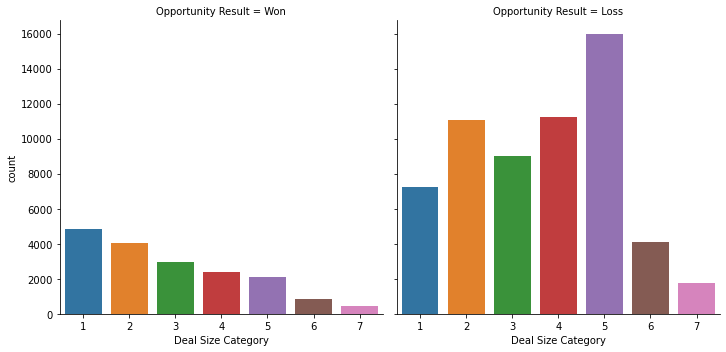

In [15]:
plt.figure(figsize=(20,5))
sns.factorplot(x='Deal Size Category',col='Opportunity Result',kind='count',data=df)

<Figure size 1440x360 with 0 Axes>

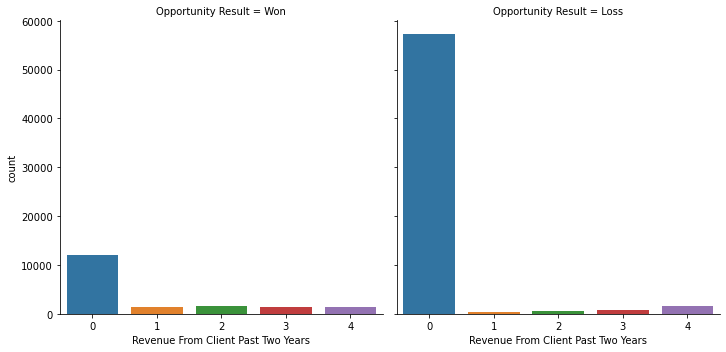

In [16]:
plt.figure(figsize=(20,5))
sns.factorplot(x='Revenue From Client Past Two Years',col='Opportunity Result',kind='count',data=df)

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
le = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = le.fit_transform(df[column])

In [19]:
df

,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,2,0,3,0,76,1,13,104,101,0,5,5,0,0.69636,0.113985,0.154215,1
1,2,0,4,2,63,0,2,163,163,0,3,5,0,0.00000,1.000000,0.000000,1
2,5,2,4,2,24,1,7,82,82,7750,1,1,0,1.00000,0.000000,0.000000,1
3,8,2,1,2,16,0,5,124,124,0,1,1,0,1.00000,0.000000,0.000000,1
4,2,0,4,2,69,0,11,91,13,69756,1,1,0,0.00000,0.141125,0.000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78020,0,0,5,2,0,0,2,0,0,250000,1,1,3,0.00000,0.000000,0.000000,6
78021,8,2,2,2,0,1,1,0,0,180000,1,1,0,0.00000,0.000000,0.000000,5
78022,2,0,5,2,0,0,2,0,0,90000,1,1,0,0.00000,0.000000,0.000000,4
78023,2,0,5,0,0,0,2,0,0,120000,1,1,0,1.00000,0.000000,0.000000,5


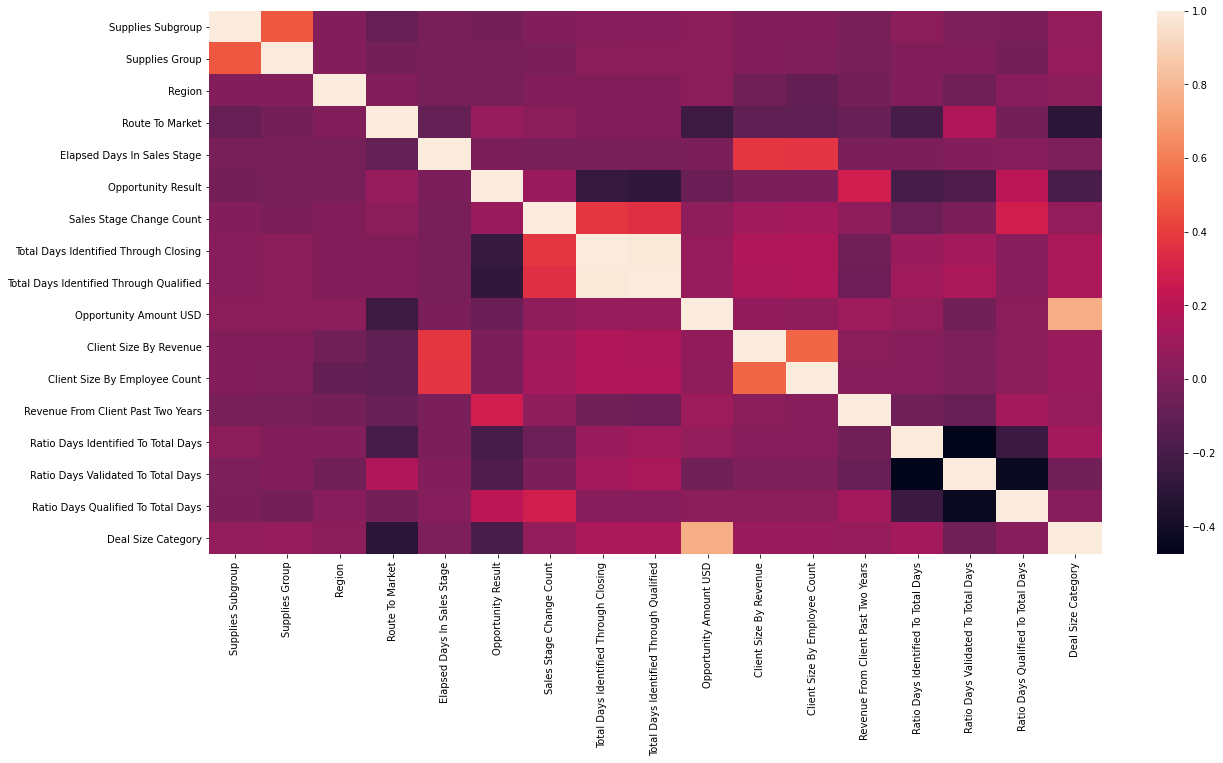

In [20]:
df_corr = df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(df_corr)

In [22]:
non_stand_df = df.drop(['Ratio Days Identified To Total Days','Ratio Days Validated To Total Days','Ratio Days Qualified To Total Days'],axis=1)
non_stand_df

,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Deal Size Category
0,2,0,3,0,76,1,13,104,101,0,5,5,0,1
1,2,0,4,2,63,0,2,163,163,0,3,5,0,1
2,5,2,4,2,24,1,7,82,82,7750,1,1,0,1
3,8,2,1,2,16,0,5,124,124,0,1,1,0,1
4,2,0,4,2,69,0,11,91,13,69756,1,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78020,0,0,5,2,0,0,2,0,0,250000,1,1,3,6
78021,8,2,2,2,0,1,1,0,0,180000,1,1,0,5
78022,2,0,5,2,0,0,2,0,0,90000,1,1,0,4
78023,2,0,5,0,0,0,2,0,0,120000,1,1,0,5


In [24]:
non_stand_col = non_stand_df.columns

In [25]:
for i in non_stand_col:
    df[i] = (df[i] - df[i].min())/(df[i].max()-df[i].min())

In [26]:
df

,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,0.2,0.000000,0.500000,0.0,0.361905,1.0,0.545455,0.500000,0.485577,0.000000,1.0,1.0,0.00,0.69636,0.113985,0.154215,0.000000
1,0.2,0.000000,0.666667,0.5,0.300000,0.0,0.045455,0.783654,0.783654,0.000000,0.5,1.0,0.00,0.00000,1.000000,0.000000,0.000000
2,0.5,0.666667,0.666667,0.5,0.114286,1.0,0.272727,0.394231,0.394231,0.007750,0.0,0.0,0.00,1.00000,0.000000,0.000000,0.000000
3,0.8,0.666667,0.166667,0.5,0.076190,0.0,0.181818,0.596154,0.596154,0.000000,0.0,0.0,0.00,1.00000,0.000000,0.000000,0.000000
4,0.2,0.000000,0.666667,0.5,0.328571,0.0,0.454545,0.437500,0.062500,0.069756,0.0,0.0,0.00,0.00000,0.141125,0.000000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78020,0.0,0.000000,0.833333,0.5,0.000000,0.0,0.045455,0.000000,0.000000,0.250000,0.0,0.0,0.75,0.00000,0.000000,0.000000,0.833333
78021,0.8,0.666667,0.333333,0.5,0.000000,1.0,0.000000,0.000000,0.000000,0.180000,0.0,0.0,0.00,0.00000,0.000000,0.000000,0.666667
78022,0.2,0.000000,0.833333,0.5,0.000000,0.0,0.045455,0.000000,0.000000,0.090000,0.0,0.0,0.00,0.00000,0.000000,0.000000,0.500000
78023,0.2,0.000000,0.833333,0.0,0.000000,0.0,0.045455,0.000000,0.000000,0.120000,0.0,0.0,0.00,1.00000,0.000000,0.000000,0.666667


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [30]:
X = df.drop('Opportunity Result',axis=1)
y = df['Opportunity Result']

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [32]:
log_cl = LogisticRegression()
dt_cl = DecisionTreeClassifier()
rf_cl = RandomForestClassifier()
nb_cl = GaussianNB()

In [34]:
log_cl.fit(X_train,y_train)

LogisticRegression()

In [35]:
dt_cl.fit(X_train,y_train)

DecisionTreeClassifier()

In [36]:
rf_cl.fit(X_train,y_train)

RandomForestClassifier()

In [37]:
nb_cl.fit(X_train,y_train)

GaussianNB()

In [38]:
log_pred = log_cl.predict(X_test)

In [39]:
dt_pred = dt_cl.predict(X_test)

In [40]:
rf_pred = rf_cl.predict(X_test)

In [41]:
nb_pred = nb_cl.predict(X_test)

In [42]:
from sklearn.metrics import classification_report

In [44]:
print(classification_report(log_pred,y_test))
print(classification_report(dt_pred,y_test))
print(classification_report(rf_pred,y_test))
print(classification_report(nb_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.93      0.85      0.89     13202
         1.0       0.45      0.66      0.54      2403

    accuracy                           0.82     15605
   macro avg       0.69      0.76      0.71     15605
weighted avg       0.86      0.82      0.84     15605

              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89     12053
         1.0       0.63      0.62      0.63      3552

    accuracy                           0.83     15605
   macro avg       0.76      0.76      0.76     15605
weighted avg       0.83      0.83      0.83     15605

              precision    recall  f1-score   support

         0.0       0.94      0.90      0.92     12622
         1.0       0.66      0.77      0.71      2983

    accuracy                           0.88     15605
   macro avg       0.80      0.84      0.82     15605
weighted avg       0.89      0.88      0.88     15605

              preci

In [46]:
df2 = df.drop(['Route To Market','Total Days Identified Through Qualified','Client Size By Employee Count','Ratio Days Qualified To Total Days','Opportunity Amount USD'],axis=1)
df2

,Supplies Subgroup,Supplies Group,Region,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Client Size By Revenue,Revenue From Client Past Two Years,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Deal Size Category
0,0.2,0.000000,0.500000,0.361905,1.0,0.545455,0.500000,1.0,0.00,0.69636,0.113985,0.000000
1,0.2,0.000000,0.666667,0.300000,0.0,0.045455,0.783654,0.5,0.00,0.00000,1.000000,0.000000
2,0.5,0.666667,0.666667,0.114286,1.0,0.272727,0.394231,0.0,0.00,1.00000,0.000000,0.000000
3,0.8,0.666667,0.166667,0.076190,0.0,0.181818,0.596154,0.0,0.00,1.00000,0.000000,0.000000
4,0.2,0.000000,0.666667,0.328571,0.0,0.454545,0.437500,0.0,0.00,0.00000,0.141125,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...
78020,0.0,0.000000,0.833333,0.000000,0.0,0.045455,0.000000,0.0,0.75,0.00000,0.000000,0.833333
78021,0.8,0.666667,0.333333,0.000000,1.0,0.000000,0.000000,0.0,0.00,0.00000,0.000000,0.666667
78022,0.2,0.000000,0.833333,0.000000,0.0,0.045455,0.000000,0.0,0.00,0.00000,0.000000,0.500000
78023,0.2,0.000000,0.833333,0.000000,0.0,0.045455,0.000000,0.0,0.00,1.00000,0.000000,0.666667


In [47]:
X = df2.drop('Opportunity Result',axis=1)
y = df2['Opportunity Result']

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [49]:
log_cl.fit(X_train,y_train)

LogisticRegression()

In [50]:
dt_cl.fit(X_train,y_train)

DecisionTreeClassifier()

In [51]:
rf_cl.fit(X_train,y_train)

RandomForestClassifier()

In [52]:
nb_cl.fit(X_train,y_train)

GaussianNB()

In [53]:
log_pred_2 = log_cl.predict(X_test)

In [54]:
dt_pred_2 = dt_cl.predict(X_test)

In [55]:
rf_pred_2 = rf_cl.predict(X_test)

In [56]:
nb_pred_2 = nb_cl.predict(X_test)

In [57]:
print(classification_report(log_pred_2,y_test))
print(classification_report(dt_pred_2,y_test))
print(classification_report(rf_pred_2,y_test))
print(classification_report(nb_pred_2,y_test))

              precision    recall  f1-score   support

         0.0       0.93      0.85      0.89     13244
         1.0       0.44      0.66      0.53      2361

    accuracy                           0.82     15605
   macro avg       0.69      0.75      0.71     15605
weighted avg       0.86      0.82      0.84     15605

              precision    recall  f1-score   support

         0.0       0.88      0.89      0.88     11982
         1.0       0.62      0.60      0.61      3623

    accuracy                           0.82     15605
   macro avg       0.75      0.74      0.74     15605
weighted avg       0.82      0.82      0.82     15605

              precision    recall  f1-score   support

         0.0       0.94      0.90      0.92     12697
         1.0       0.63      0.76      0.69      2908

    accuracy                           0.87     15605
   macro avg       0.78      0.83      0.80     15605
weighted avg       0.88      0.87      0.88     15605

              preci

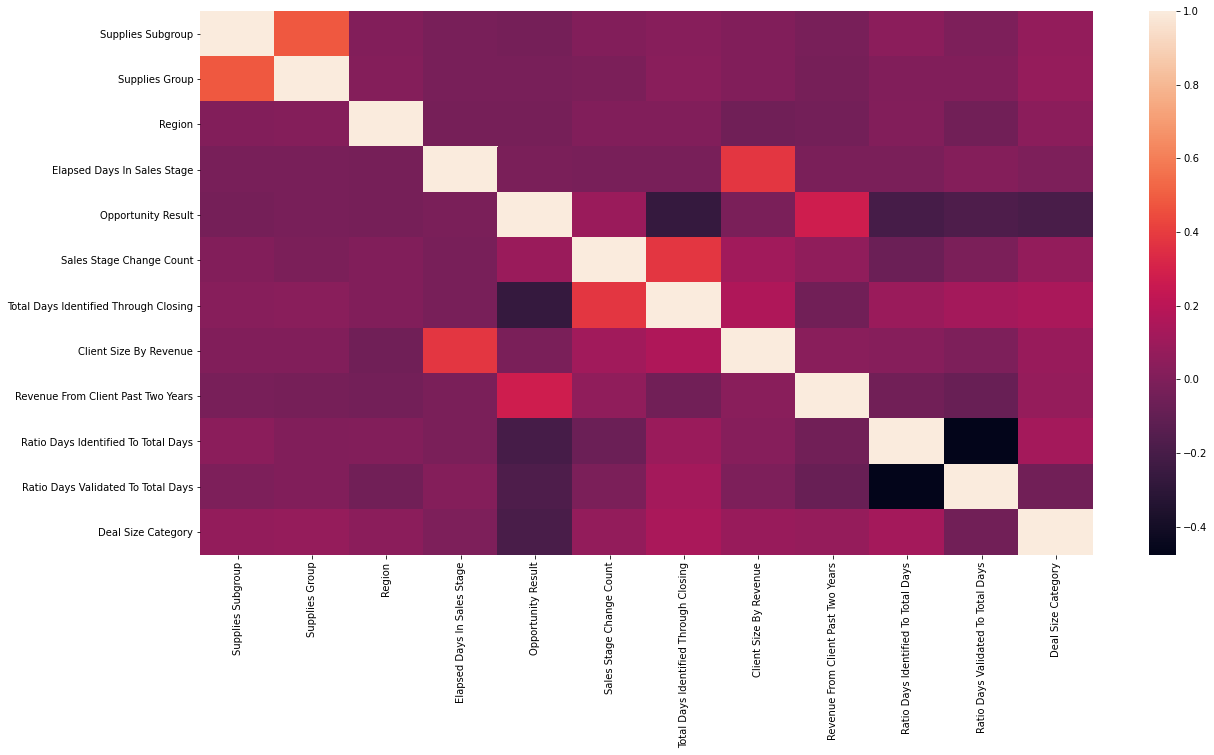

In [58]:
plt.figure(figsize=(20,10))
sns.heatmap(df2.corr())

In [59]:
df3 = df2.drop(['Supplies Group','Ratio Days Validated To Total Days'],axis=1)
df3

,Supplies Subgroup,Region,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Client Size By Revenue,Revenue From Client Past Two Years,Ratio Days Identified To Total Days,Deal Size Category
0,0.2,0.500000,0.361905,1.0,0.545455,0.500000,1.0,0.00,0.69636,0.000000
1,0.2,0.666667,0.300000,0.0,0.045455,0.783654,0.5,0.00,0.00000,0.000000
2,0.5,0.666667,0.114286,1.0,0.272727,0.394231,0.0,0.00,1.00000,0.000000
3,0.8,0.166667,0.076190,0.0,0.181818,0.596154,0.0,0.00,1.00000,0.000000
4,0.2,0.666667,0.328571,0.0,0.454545,0.437500,0.0,0.00,0.00000,0.500000
...,...,...,...,...,...,...,...,...,...,...
78020,0.0,0.833333,0.000000,0.0,0.045455,0.000000,0.0,0.75,0.00000,0.833333
78021,0.8,0.333333,0.000000,1.0,0.000000,0.000000,0.0,0.00,0.00000,0.666667
78022,0.2,0.833333,0.000000,0.0,0.045455,0.000000,0.0,0.00,0.00000,0.500000
78023,0.2,0.833333,0.000000,0.0,0.045455,0.000000,0.0,0.00,1.00000,0.666667


In [60]:
X = df.drop('Opportunity Result',axis=1)
y = df['Opportunity Result']

In [61]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [62]:
log_cl.fit(X_train,y_train)

LogisticRegression()

In [63]:
dt_cl.fit(X_train,y_train)

DecisionTreeClassifier()

In [64]:
rf_cl.fit(X_train,y_train)

RandomForestClassifier()

In [65]:
nb_cl.fit(X_train,y_train)

GaussianNB()

In [71]:
log_pred_3 = log_cl.predict(X_test)

In [72]:
dt_pred_3 = dt_cl.predict(X_test)

In [73]:
rf_pred_3 = rf_cl.predict(X_test)

In [74]:
nb_pred_3 = nb_cl.predict(X_test)

In [75]:
print(classification_report(log_pred_3,y_test))
print(classification_report(dt_pred_3,y_test))
print(classification_report(rf_pred_3,y_test))
print(classification_report(nb_pred_3,y_test))

              precision    recall  f1-score   support

         0.0       0.93      0.85      0.89     13202
         1.0       0.45      0.66      0.54      2403

    accuracy                           0.82     15605
   macro avg       0.69      0.76      0.71     15605
weighted avg       0.86      0.82      0.84     15605

              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89     12108
         1.0       0.62      0.63      0.63      3497

    accuracy                           0.83     15605
   macro avg       0.76      0.76      0.76     15605
weighted avg       0.83      0.83      0.83     15605

              precision    recall  f1-score   support

         0.0       0.94      0.90      0.92     12619
         1.0       0.65      0.77      0.71      2986

    accuracy                           0.88     15605
   macro avg       0.80      0.84      0.82     15605
weighted avg       0.89      0.88      0.88     15605

              preci